In [139]:
# ..................................................................................
# algoritmo PSO que maximisa la funcion unimodal f(x) = sin(x) + sin(x^2)
# ..................................................................................

import numpy as np

# funcion objetivo hiperboloide eliptico
def funcion_objetivo(x):
    return np.sin(x) + np.sin(x**2)

In [140]:
# parametros
num_particulas = 2  # numero de particulas
dim = 1  # dimensiones
cantidad_iteraciones = 30  # maximo numero de iteraciones
c1 = 1.49  # componente cognitivo
c2 = 1.49  # componente social
w = 0.5  # factor de inercia
limite_inf = 0   # limite inferior de busqueda
limite_sup = 10  # limite superior de busqueda

In [141]:
# inicializacion
particulas = np.random.uniform(limite_inf, limite_sup, (num_particulas, dim))  # posiciones iniciales de las particulas

velocidades = np.zeros((num_particulas, dim))  # inicializacion de la matriz de velocidades en cero

# inicializacion de pbest y gbest
pbest = particulas.copy()  # mejores posiciones personales iniciales

fitness_pbest = np.empty(num_particulas)  # mejores fitness personales iniciales
for i in range(num_particulas):
    fitness_pbest[i] = funcion_objetivo(*particulas[i])

gbest = pbest[np.argmin(fitness_pbest)]  # mejor posicion global inicial
fitness_gbest = np.min(fitness_pbest)  # fitness global inicial

In [142]:
# busqueda
for iteracion in range(cantidad_iteraciones):
    for i in range(num_particulas):  # iteracion sobre cada partícula
        r1, r2 = np.random.rand(), np.random.rand()  # generacion dos numeros aleatorios

        # actualizacion de la velocidad de la particula en cada dimension
        for d in range(dim):
            velocidades[i][d] = (w * velocidades[i][d] + c1 * r1 * (pbest[i][d] - particulas[i][d]) + c2 * r2 * (gbest[d] - particulas[i][d]))

        for d in range(dim):
            particulas[i][d] = particulas[i][d] + velocidades[i][d]  # cctualizacion de la posicion de la particula en cada dimension

            # mantenimiento de las partículas dentro de los limites
            particulas[i][d] = np.clip(particulas[i][d], limite_inf, limite_sup)

        fitness = funcion_objetivo(*particulas[i])  # Evaluacion de la funcion objetivo para la nueva posicion

        # actualizacion el mejor personal
        if fitness > fitness_pbest[i]:
            fitness_pbest[i] = fitness  # actualizacion del mejor fitness personal
            pbest[i] = particulas[i].copy()  # actualizacion de la mejor posicion personal

            # actualizacion del mejor global
            if fitness > fitness_gbest:
                fitness_gbest = fitness  # actualizacion del mejor fitness global
                gbest = particulas[i].copy()  # actualizacion de la mejor posicion global

    # imprimir el mejor global en cada iteracion
    print(f"Iteración {iteracion + 1}: Mejor posición global {gbest}, Valor {fitness_gbest}")

# resultado
solucion_optima = gbest  # mejor posicion global final
valor_optimo = fitness_gbest  # mejor fitness global final

print("\nSolucion optima (x):", solucion_optima)
print("Valor optimo:", valor_optimo)

Iteración 1: Mejor posición global [8.72131772], Valor 1.2624698229512803
Iteración 2: Mejor posición global [8.7311569], Valor 1.3805397417111074
Iteración 3: Mejor posición global [8.73607649], Valor 1.4316264377588905
Iteración 4: Mejor posición global [8.73853628], Valor 1.4549949246012566
Iteración 5: Mejor posición global [8.73976618], Valor 1.4661140480967632
Iteración 6: Mejor posición global [8.74038113], Valor 1.4715297915198233
Iteración 7: Mejor posición global [8.7406886], Valor 1.4742014001656247
Iteración 8: Mejor posición global [8.74084234], Valor 1.4755281007190248
Iteración 9: Mejor posición global [8.74091921], Valor 1.4761891703380174
Iteración 10: Mejor posición global [8.74095764], Valor 1.4765191343958715
Iteración 11: Mejor posición global [8.74097686], Valor 1.4766839736636252
Iteración 12: Mejor posición global [8.74098647], Valor 1.4767663575980525
Iteración 13: Mejor posición global [8.74099127], Valor 1.4768075406392724
Iteración 14: Mejor posición global 

real:  1.9839126084362302
encontrado:  1.6074678380253768


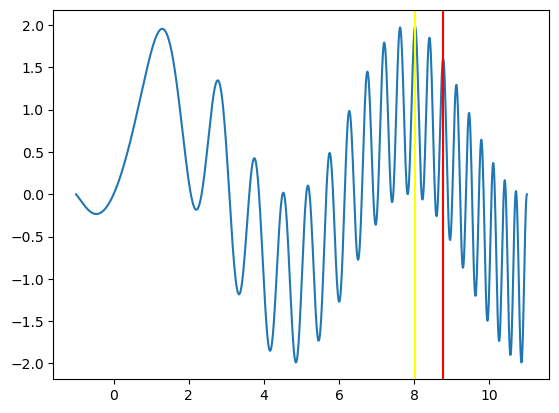

In [143]:
import matplotlib.pyplot as plt

x = np.linspace(-1,11,1000)
y = funcion_objetivo(x)
max_real = x[np.argmax(y)]
plt.plot(x,y)
plt.axvline(solucion_optima, color='red')
plt.axvline(max_real, color='yellow')

print('real: ', y.max())
print('encontrado: ', valor_optimo)
